In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df0 = pd.read_pickle('Model_review.pkl')

In [3]:
model = df0.copy()

In [19]:
# Shape of data set
print(str(len(model))+' rows.\n'+str(len(model.columns))+' columns.')
print(str(len(model.columns)-1)+' features.')

4018 rows.
60 columns.
59 features.


In [13]:
# null check
model.isnull().sum().sum()

0

Text(0.5, 1.0, 'Distribution of daily prices')

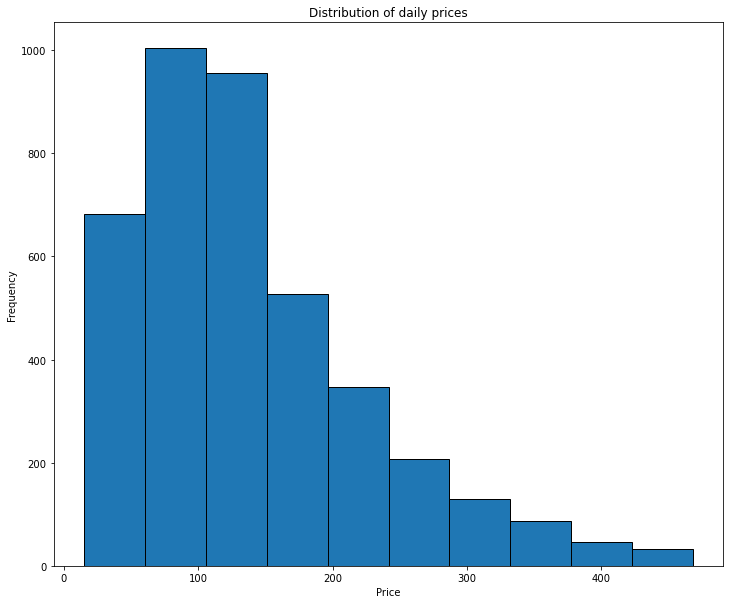

In [18]:
# Plot price
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
model['price'].plot(kind = 'hist', bins = 10, edgecolor = 'black')
plt.xlabel('Price')
plt.title('Distribution of daily prices')

In [22]:
# PRE PROCESSING
X = model.drop(['price'],axis = 1)
y = model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MSE: 4649.702473811659
RMSE: 68.18872688217355
RRMSE: 0.49856307570850505
MAE: 48.536953962196705
RMAE: 0.35487879242457493
EV: 0.41368706811949485
R2: 0.41318782091486317


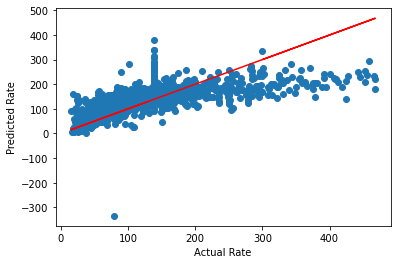

In [23]:
# REGRESSION MODELING #
lm = LinearRegression()
lm.fit(X_train,y_train)

# PREDICTIONS
plm = lm.predict(X_test)
plt.scatter(y_test,plm)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

# EVALUATE THE MODEL
print("MSE:",metrics.mean_squared_error (y_test,plm))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,plm)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,plm))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, plm))
print("RMAE:", metrics.mean_absolute_error (y_test, plm)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,plm))
print("R2:", metrics.r2_score(y_test,plm))

MSE: 3567.740799684022
RMSE: 59.730568385743844
RRMSE: 0.436721101123811
MAE: 42.09816325381046
RMAE: 0.30780146093306104
EV: 0.5506060329718407
R2: 0.5497359745348875


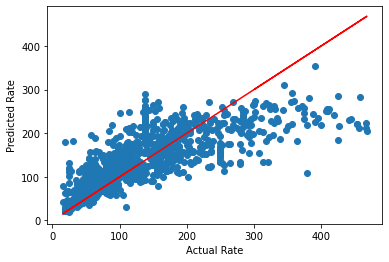

In [24]:
# RANDOM FOREST #
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)

# PREDICTIONS
plt.scatter(y_test,p2)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

# EVALUATE THE MODEL RFR1
print("MSE:",metrics.mean_squared_error (y_test,p2))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,p2)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,p2))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, p2))
print("RMAE:", metrics.mean_absolute_error (y_test, p2)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,p2))
print("R2:", metrics.r2_score(y_test,p2))

Epoch 1/1000
95/95 [==============================] - 1s 3ms/step - loss: 24852.2051 - val_loss: 21494.9316
Epoch 2/1000
95/95 [==============================] - 0s 2ms/step - loss: 15141.4180 - val_loss: 8743.9727
Epoch 3/1000
95/95 [==============================] - 0s 2ms/step - loss: 6014.2285 - val_loss: 5580.9224
Epoch 4/1000
95/95 [==============================] - 0s 2ms/step - loss: 4813.7852 - val_loss: 5068.1416
Epoch 5/1000
95/95 [==============================] - 0s 2ms/step - loss: 4491.5864 - val_loss: 4862.5879
Epoch 6/1000
95/95 [==============================] - 0s 2ms/step - loss: 4314.7124 - val_loss: 4747.3452
Epoch 7/1000
95/95 [==============================] - 0s 2ms/step - loss: 4217.7334 - val_loss: 4689.8970
Epoch 8/1000
95/95 [==============================] - 0s 2ms/step - loss: 4166.8267 - val_loss: 4619.1450
Epoch 9/1000
95/95 [==============================] - 0s 4ms/step - loss: 4121.1567 - val_loss: 4578.9497
Epoch 10/1000
95/95 [======================

95/95 [==============================] - 0s 4ms/step - loss: 2857.0154 - val_loss: 3714.6841
Epoch 78/1000
95/95 [==============================] - 0s 3ms/step - loss: 2903.2639 - val_loss: 3736.1055
Epoch 79/1000
95/95 [==============================] - 0s 2ms/step - loss: 2897.8882 - val_loss: 3705.6851
Epoch 80/1000
95/95 [==============================] - 0s 2ms/step - loss: 2755.0981 - val_loss: 3694.8301
Epoch 81/1000
95/95 [==============================] - 0s 2ms/step - loss: 2834.4780 - val_loss: 3736.0667
Epoch 82/1000
95/95 [==============================] - 0s 4ms/step - loss: 2886.6831 - val_loss: 3658.0144
Epoch 83/1000
95/95 [==============================] - 0s 5ms/step - loss: 2808.7375 - val_loss: 3700.4895
Epoch 84/1000
95/95 [==============================] - 0s 4ms/step - loss: 2729.2666 - val_loss: 3717.8970
Epoch 85/1000
95/95 [==============================] - 0s 4ms/step - loss: 2786.9536 - val_loss: 3684.2341
Epoch 86/1000
95/95 [==============================

<AxesSubplot:>

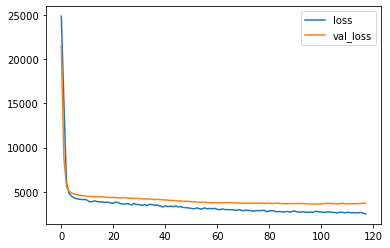

In [32]:
# DEEP LEARNING #
# Creating Model: dm1
dm1 = Sequential()
dm1.add(Dense(50,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(25,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(1, activation = 'linear'))

dm1.compile(optimizer = 'adam', loss = 'mse', )
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20,
        restore_best_weights=True)
# Training DM1
dm1.fit(x = X_train, y = y_train, epochs = 1000,validation_data = (X_test,y_test), callbacks = [early_stop], batch_size = 32)
# MODEL OVERFIT? DM1
pd.DataFrame(dm1.history.history).plot()

32/32 [==============================] - 0s 1ms/step
MSE: 3612.1793022466645
RMSE: 60.101408488043475
RRMSE: 0.4394325050530563
MAE: 42.30972748760841
RMAE: 0.3093483165488651
EV: 0.5441404221910996
R2: 0.5441276469760947


Text(0, 0.5, 'Predicted Rate')

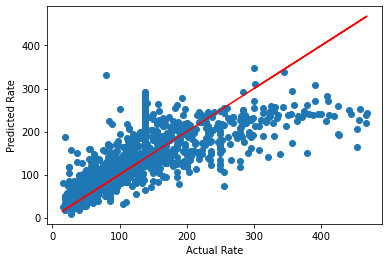

In [33]:
# MODEL EVALUATION DM1
pdm1 = dm1.predict(X_test)

print("MSE:",metrics.mean_squared_error (y_test,pdm1))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,pdm1)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,pdm1))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, pdm1))
print("RMAE:", metrics.mean_absolute_error (y_test, pdm1)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,pdm1))
print("R2:", metrics.r2_score(y_test,pdm1))

# PLOT THE PREDICTIONS DM1
plt.scatter(y_test,pdm1)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# LSTM
model0 = Sequential()
model0.add(Dense(50,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(25,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(1, activation = 'linear'))

cp0 = ModelCheckpoint('model0/', save_best_only = True)
model0.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=.0001), metrics = [RootMeanSquaredError()])
history = model0.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 1000, callbacks =[cp0])

Epoch 1/1000
95/95 [==============================] - 2s 14ms/step - loss: 26890.9258 - root_mean_squared_error: 163.9845 - val_loss: 26618.7539 - val_root_mean_squared_error: 163.1525
Epoch 2/1000
95/95 [==============================] - 1s 15ms/step - loss: 26683.3887 - root_mean_squared_error: 163.3505 - val_loss: 26404.9668 - val_root_mean_squared_error: 162.4960
Epoch 3/1000
95/95 [==============================] - 1s 15ms/step - loss: 26435.2734 - root_mean_squared_error: 162.5893 - val_loss: 26152.1270 - val_root_mean_squared_error: 161.7162
Epoch 4/1000
95/95 [==============================] - 1s 11ms/step - loss: 26149.5312 - root_mean_squared_error: 161.7082 - val_loss: 25843.3359 - val_root_mean_squared_error: 160.7586
Epoch 5/1000
95/95 [==============================] - 1s 12ms/step - loss: 25811.1035 - root_mean_squared_error: 160.6583 - val_loss: 25467.9121 - val_root_mean_squared_error: 159.5867
Epoch 6/1000
95/95 [==============================] - 1s 14ms/step - loss: 

95/95 [==============================] - 1s 15ms/step - loss: 6484.9922 - root_mean_squared_error: 80.5294 - val_loss: 6776.5996 - val_root_mean_squared_error: 82.3201
Epoch 26/1000
95/95 [==============================] - 1s 13ms/step - loss: 6108.4907 - root_mean_squared_error: 78.1568 - val_loss: 6431.6885 - val_root_mean_squared_error: 80.1978
Epoch 27/1000
95/95 [==============================] - 1s 14ms/step - loss: 5818.6265 - root_mean_squared_error: 76.2799 - val_loss: 6165.8325 - val_root_mean_squared_error: 78.5228
Epoch 28/1000
95/95 [==============================] - 1s 13ms/step - loss: 5578.9009 - root_mean_squared_error: 74.6920 - val_loss: 5958.6953 - val_root_mean_squared_error: 77.1926
Epoch 29/1000
95/95 [==============================] - 1s 12ms/step - loss: 5444.9814 - root_mean_squared_error: 73.7901 - val_loss: 5806.6294 - val_root_mean_squared_error: 76.2012
Epoch 30/1000
95/95 [==============================] - 2s 17ms/step - loss: 5221.1987 - root_mean_square

Epoch 50/1000
95/95 [==============================] - 1s 16ms/step - loss: 4398.2690 - root_mean_squared_error: 66.3195 - val_loss: 4893.8384 - val_root_mean_squared_error: 69.9560
Epoch 51/1000
95/95 [==============================] - 1s 13ms/step - loss: 4447.8198 - root_mean_squared_error: 66.6920 - val_loss: 4877.2881 - val_root_mean_squared_error: 69.8376
Epoch 52/1000
95/95 [==============================] - 1s 14ms/step - loss: 4402.9756 - root_mean_squared_error: 66.3549 - val_loss: 4863.2227 - val_root_mean_squared_error: 69.7368
Epoch 53/1000
95/95 [==============================] - 1s 11ms/step - loss: 4394.1177 - root_mean_squared_error: 66.2881 - val_loss: 4849.1987 - val_root_mean_squared_error: 69.6362
Epoch 54/1000
95/95 [==============================] - 1s 15ms/step - loss: 4355.7378 - root_mean_squared_error: 65.9980 - val_loss: 4833.8633 - val_root_mean_squared_error: 69.5260
Epoch 55/1000
95/95 [==============================] - 1s 14ms/step - loss: 4336.1714 - ro

Epoch 75/1000
95/95 [==============================] - 1s 14ms/step - loss: 4164.6924 - root_mean_squared_error: 64.5344 - val_loss: 4637.4097 - val_root_mean_squared_error: 68.0985
Epoch 76/1000
95/95 [==============================] - 1s 10ms/step - loss: 4165.1333 - root_mean_squared_error: 64.5378 - val_loss: 4629.0029 - val_root_mean_squared_error: 68.0368
Epoch 77/1000
95/95 [==============================] - 1s 13ms/step - loss: 4153.7803 - root_mean_squared_error: 64.4498 - val_loss: 4625.9263 - val_root_mean_squared_error: 68.0142
Epoch 78/1000
95/95 [==============================] - 1s 10ms/step - loss: 4168.9443 - root_mean_squared_error: 64.5674 - val_loss: 4620.1284 - val_root_mean_squared_error: 67.9715
Epoch 79/1000
95/95 [==============================] - 1s 13ms/step - loss: 4126.8408 - root_mean_squared_error: 64.2405 - val_loss: 4615.6035 - val_root_mean_squared_error: 67.9382
Epoch 80/1000
95/95 [==============================] - 1s 10ms/step - loss: 4027.0332 - ro

Epoch 100/1000
95/95 [==============================] - 1s 13ms/step - loss: 4012.9270 - root_mean_squared_error: 63.3477 - val_loss: 4530.7808 - val_root_mean_squared_error: 67.3111
Epoch 101/1000
95/95 [==============================] - 1s 12ms/step - loss: 4042.1875 - root_mean_squared_error: 63.5782 - val_loss: 4527.9136 - val_root_mean_squared_error: 67.2898
Epoch 102/1000
95/95 [==============================] - 1s 10ms/step - loss: 4057.5608 - root_mean_squared_error: 63.6990 - val_loss: 4523.5073 - val_root_mean_squared_error: 67.2570
Epoch 103/1000
95/95 [==============================] - 1s 13ms/step - loss: 4004.9595 - root_mean_squared_error: 63.2847 - val_loss: 4518.1094 - val_root_mean_squared_error: 67.2169
Epoch 104/1000
95/95 [==============================] - 1s 10ms/step - loss: 3955.1709 - root_mean_squared_error: 62.8901 - val_loss: 4516.2622 - val_root_mean_squared_error: 67.2031
Epoch 105/1000
95/95 [==============================] - 0s 2ms/step - loss: 3969.3306

Epoch 126/1000
95/95 [==============================] - 1s 12ms/step - loss: 3897.8086 - root_mean_squared_error: 62.4324 - val_loss: 4465.8794 - val_root_mean_squared_error: 66.8272
Epoch 127/1000
95/95 [==============================] - 1s 11ms/step - loss: 3884.1846 - root_mean_squared_error: 62.3232 - val_loss: 4464.9907 - val_root_mean_squared_error: 66.8206
Epoch 128/1000
95/95 [==============================] - 1s 14ms/step - loss: 3936.1433 - root_mean_squared_error: 62.7387 - val_loss: 4463.4731 - val_root_mean_squared_error: 66.8092
Epoch 129/1000
95/95 [==============================] - 1s 13ms/step - loss: 3876.3518 - root_mean_squared_error: 62.2604 - val_loss: 4459.0972 - val_root_mean_squared_error: 66.7765
Epoch 130/1000
95/95 [==============================] - 1s 13ms/step - loss: 3858.0710 - root_mean_squared_error: 62.1134 - val_loss: 4457.2529 - val_root_mean_squared_error: 66.7627
Epoch 131/1000
95/95 [==============================] - 1s 13ms/step - loss: 3952.999

95/95 [==============================] - 1s 9ms/step - loss: 3792.5984 - root_mean_squared_error: 61.5841 - val_loss: 4417.4883 - val_root_mean_squared_error: 66.4642
Epoch 153/1000
95/95 [==============================] - 1s 12ms/step - loss: 3838.5930 - root_mean_squared_error: 61.9564 - val_loss: 4415.0762 - val_root_mean_squared_error: 66.4460
Epoch 154/1000
95/95 [==============================] - 0s 3ms/step - loss: 3825.1165 - root_mean_squared_error: 61.8475 - val_loss: 4415.6157 - val_root_mean_squared_error: 66.4501
Epoch 155/1000
95/95 [==============================] - 1s 12ms/step - loss: 3811.4375 - root_mean_squared_error: 61.7368 - val_loss: 4414.4663 - val_root_mean_squared_error: 66.4415
Epoch 156/1000
95/95 [==============================] - 0s 4ms/step - loss: 3790.4697 - root_mean_squared_error: 61.5668 - val_loss: 4415.8770 - val_root_mean_squared_error: 66.4521
Epoch 157/1000
95/95 [==============================] - 1s 12ms/step - loss: 3966.3674 - root_mean_squa

95/95 [==============================] - 0s 4ms/step - loss: 3825.1016 - root_mean_squared_error: 61.8474 - val_loss: 4386.0835 - val_root_mean_squared_error: 66.2275
Epoch 182/1000
95/95 [==============================] - 1s 11ms/step - loss: 3740.0903 - root_mean_squared_error: 61.1563 - val_loss: 4385.0625 - val_root_mean_squared_error: 66.2198
Epoch 183/1000
95/95 [==============================] - 1s 12ms/step - loss: 3822.4661 - root_mean_squared_error: 61.8261 - val_loss: 4382.9707 - val_root_mean_squared_error: 66.2040
Epoch 184/1000
95/95 [==============================] - 0s 3ms/step - loss: 3830.7910 - root_mean_squared_error: 61.8934 - val_loss: 4383.2720 - val_root_mean_squared_error: 66.2063
Epoch 185/1000
95/95 [==============================] - 1s 12ms/step - loss: 3784.1904 - root_mean_squared_error: 61.5158 - val_loss: 4381.7607 - val_root_mean_squared_error: 66.1949
Epoch 186/1000
95/95 [==============================] - 1s 10ms/step - loss: 3744.8516 - root_mean_squ

95/95 [==============================] - 1s 12ms/step - loss: 3740.0269 - root_mean_squared_error: 61.1558 - val_loss: 4361.4355 - val_root_mean_squared_error: 66.0412
Epoch 211/1000
95/95 [==============================] - 1s 13ms/step - loss: 3826.4915 - root_mean_squared_error: 61.8586 - val_loss: 4359.7769 - val_root_mean_squared_error: 66.0286
Epoch 212/1000
95/95 [==============================] - 0s 4ms/step - loss: 3671.2515 - root_mean_squared_error: 60.5909 - val_loss: 4359.8633 - val_root_mean_squared_error: 66.0293
Epoch 213/1000
95/95 [==============================] - 0s 3ms/step - loss: 3757.4119 - root_mean_squared_error: 61.2977 - val_loss: 4360.9102 - val_root_mean_squared_error: 66.0372
Epoch 214/1000
95/95 [==============================] - 0s 5ms/step - loss: 3703.2393 - root_mean_squared_error: 60.8542 - val_loss: 4361.2627 - val_root_mean_squared_error: 66.0399
Epoch 215/1000
95/95 [==============================] - 0s 4ms/step - loss: 3731.7407 - root_mean_squar

95/95 [==============================] - 1s 11ms/step - loss: 3689.1235 - root_mean_squared_error: 60.7382 - val_loss: 4340.6606 - val_root_mean_squared_error: 65.8837
Epoch 244/1000
95/95 [==============================] - 0s 4ms/step - loss: 3693.2080 - root_mean_squared_error: 60.7718 - val_loss: 4340.8262 - val_root_mean_squared_error: 65.8849
Epoch 245/1000
95/95 [==============================] - 0s 3ms/step - loss: 3671.2195 - root_mean_squared_error: 60.5906 - val_loss: 4341.8940 - val_root_mean_squared_error: 65.8931
Epoch 246/1000
95/95 [==============================] - 1s 12ms/step - loss: 3581.2490 - root_mean_squared_error: 59.8435 - val_loss: 4340.3608 - val_root_mean_squared_error: 65.8814
Epoch 247/1000
95/95 [==============================] - 1s 12ms/step - loss: 3733.1304 - root_mean_squared_error: 61.0993 - val_loss: 4340.3301 - val_root_mean_squared_error: 65.8812
Epoch 248/1000
95/95 [==============================] - 1s 10ms/step - loss: 3707.3118 - root_mean_squ

95/95 [==============================] - 1s 13ms/step - loss: 3653.0471 - root_mean_squared_error: 60.4404 - val_loss: 4324.1831 - val_root_mean_squared_error: 65.7585
Epoch 275/1000
95/95 [==============================] - 0s 2ms/step - loss: 3554.9419 - root_mean_squared_error: 59.6233 - val_loss: 4328.8271 - val_root_mean_squared_error: 65.7938
Epoch 276/1000
95/95 [==============================] - 0s 5ms/step - loss: 3637.8262 - root_mean_squared_error: 60.3144 - val_loss: 4327.6538 - val_root_mean_squared_error: 65.7849
Epoch 277/1000
95/95 [==============================] - 0s 3ms/step - loss: 3594.1184 - root_mean_squared_error: 59.9510 - val_loss: 4325.1719 - val_root_mean_squared_error: 65.7660
Epoch 278/1000
95/95 [==============================] - 0s 4ms/step - loss: 3590.6045 - root_mean_squared_error: 59.9217 - val_loss: 4324.3613 - val_root_mean_squared_error: 65.7599
Epoch 279/1000
95/95 [==============================] - 1s 13ms/step - loss: 3649.2097 - root_mean_squar

Epoch 309/1000
95/95 [==============================] - 0s 4ms/step - loss: 3600.3210 - root_mean_squared_error: 60.0027 - val_loss: 4308.7188 - val_root_mean_squared_error: 65.6408
Epoch 310/1000
95/95 [==============================] - 0s 4ms/step - loss: 3606.4856 - root_mean_squared_error: 60.0540 - val_loss: 4306.9580 - val_root_mean_squared_error: 65.6274
Epoch 311/1000
95/95 [==============================] - 0s 4ms/step - loss: 3585.6694 - root_mean_squared_error: 59.8805 - val_loss: 4306.7612 - val_root_mean_squared_error: 65.6259
Epoch 312/1000
95/95 [==============================] - 1s 16ms/step - loss: 3519.7219 - root_mean_squared_error: 59.3272 - val_loss: 4305.8857 - val_root_mean_squared_error: 65.6192
Epoch 313/1000
95/95 [==============================] - 0s 4ms/step - loss: 3580.6870 - root_mean_squared_error: 59.8388 - val_loss: 4306.1079 - val_root_mean_squared_error: 65.6209
Epoch 314/1000
95/95 [==============================] - 2s 16ms/step - loss: 3645.7246 - 

Epoch 345/1000
95/95 [==============================] - 1s 11ms/step - loss: 3672.2771 - root_mean_squared_error: 60.5993 - val_loss: 4291.3203 - val_root_mean_squared_error: 65.5082
Epoch 346/1000
95/95 [==============================] - 0s 3ms/step - loss: 3576.9309 - root_mean_squared_error: 59.8074 - val_loss: 4291.9512 - val_root_mean_squared_error: 65.5130
Epoch 347/1000
95/95 [==============================] - 1s 10ms/step - loss: 3588.1440 - root_mean_squared_error: 59.9011 - val_loss: 4289.9155 - val_root_mean_squared_error: 65.4974
Epoch 348/1000
95/95 [==============================] - 0s 2ms/step - loss: 3596.1919 - root_mean_squared_error: 59.9683 - val_loss: 4290.4141 - val_root_mean_squared_error: 65.5013
Epoch 349/1000
95/95 [==============================] - 1s 10ms/step - loss: 3534.0269 - root_mean_squared_error: 59.4477 - val_loss: 4288.7446 - val_root_mean_squared_error: 65.4885
Epoch 350/1000
95/95 [==============================] - 1s 9ms/step - loss: 3520.0686 -

Epoch 376/1000
95/95 [==============================] - 0s 2ms/step - loss: 3537.7903 - root_mean_squared_error: 59.4793 - val_loss: 4266.2588 - val_root_mean_squared_error: 65.3166
Epoch 377/1000
95/95 [==============================] - 0s 4ms/step - loss: 3541.8276 - root_mean_squared_error: 59.5133 - val_loss: 4266.1465 - val_root_mean_squared_error: 65.3157
Epoch 378/1000
95/95 [==============================] - 0s 4ms/step - loss: 3489.6863 - root_mean_squared_error: 59.0736 - val_loss: 4265.7812 - val_root_mean_squared_error: 65.3130
Epoch 379/1000
95/95 [==============================] - 0s 2ms/step - loss: 3471.5811 - root_mean_squared_error: 58.9201 - val_loss: 4266.5220 - val_root_mean_squared_error: 65.3186
Epoch 380/1000
95/95 [==============================] - 1s 12ms/step - loss: 3565.8347 - root_mean_squared_error: 59.7146 - val_loss: 4262.8521 - val_root_mean_squared_error: 65.2905
Epoch 381/1000
95/95 [==============================] - 0s 2ms/step - loss: 3435.4744 - r

Epoch 409/1000
95/95 [==============================] - 0s 3ms/step - loss: 3460.5586 - root_mean_squared_error: 58.8265 - val_loss: 4244.3970 - val_root_mean_squared_error: 65.1490
Epoch 410/1000
95/95 [==============================] - 0s 5ms/step - loss: 3528.7449 - root_mean_squared_error: 59.4032 - val_loss: 4242.8882 - val_root_mean_squared_error: 65.1375
Epoch 411/1000
95/95 [==============================] - 1s 13ms/step - loss: 3511.8110 - root_mean_squared_error: 59.2605 - val_loss: 4238.1704 - val_root_mean_squared_error: 65.1012
Epoch 412/1000
95/95 [==============================] - 0s 2ms/step - loss: 3507.3196 - root_mean_squared_error: 59.2226 - val_loss: 4238.2485 - val_root_mean_squared_error: 65.1018
Epoch 413/1000
95/95 [==============================] - 0s 2ms/step - loss: 3415.3674 - root_mean_squared_error: 58.4411 - val_loss: 4238.9634 - val_root_mean_squared_error: 65.1073
Epoch 414/1000
95/95 [==============================] - 0s 4ms/step - loss: 3460.8206 - r

Epoch 439/1000
95/95 [==============================] - 1s 10ms/step - loss: 3444.5940 - root_mean_squared_error: 58.6907 - val_loss: 4219.7847 - val_root_mean_squared_error: 64.9599
Epoch 440/1000
95/95 [==============================] - 1s 10ms/step - loss: 3450.3733 - root_mean_squared_error: 58.7399 - val_loss: 4215.5903 - val_root_mean_squared_error: 64.9276
Epoch 441/1000
95/95 [==============================] - 0s 2ms/step - loss: 3427.3621 - root_mean_squared_error: 58.5437 - val_loss: 4217.4097 - val_root_mean_squared_error: 64.9416
Epoch 442/1000
95/95 [==============================] - 0s 2ms/step - loss: 3477.1321 - root_mean_squared_error: 58.9672 - val_loss: 4216.1943 - val_root_mean_squared_error: 64.9322
Epoch 443/1000
95/95 [==============================] - 1s 9ms/step - loss: 3445.7959 - root_mean_squared_error: 58.7009 - val_loss: 4214.0483 - val_root_mean_squared_error: 64.9157
Epoch 444/1000
95/95 [==============================] - 0s 2ms/step - loss: 3387.3169 - 

95/95 [==============================] - 1s 10ms/step - loss: 3302.4773 - root_mean_squared_error: 57.4672 - val_loss: 4191.0898 - val_root_mean_squared_error: 64.7386
Epoch 471/1000
95/95 [==============================] - 1s 11ms/step - loss: 3406.1143 - root_mean_squared_error: 58.3619 - val_loss: 4189.6392 - val_root_mean_squared_error: 64.7274
Epoch 472/1000
95/95 [==============================] - 1s 10ms/step - loss: 3393.7434 - root_mean_squared_error: 58.2558 - val_loss: 4188.6636 - val_root_mean_squared_error: 64.7199
Epoch 473/1000
95/95 [==============================] - 1s 12ms/step - loss: 3343.4526 - root_mean_squared_error: 57.8226 - val_loss: 4185.3320 - val_root_mean_squared_error: 64.6941
Epoch 474/1000
95/95 [==============================] - 0s 2ms/step - loss: 3381.1016 - root_mean_squared_error: 58.1472 - val_loss: 4185.8374 - val_root_mean_squared_error: 64.6981
Epoch 475/1000
95/95 [==============================] - 1s 12ms/step - loss: 3459.9241 - root_mean_sq

95/95 [==============================] - 1s 13ms/step - loss: 3421.4050 - root_mean_squared_error: 58.4928 - val_loss: 4150.9688 - val_root_mean_squared_error: 64.4280
Epoch 499/1000
95/95 [==============================] - 1s 12ms/step - loss: 3354.6230 - root_mean_squared_error: 57.9191 - val_loss: 4149.8604 - val_root_mean_squared_error: 64.4194
Epoch 500/1000
95/95 [==============================] - 0s 5ms/step - loss: 3305.5884 - root_mean_squared_error: 57.4942 - val_loss: 4149.8755 - val_root_mean_squared_error: 64.4195
Epoch 501/1000
95/95 [==============================] - 1s 14ms/step - loss: 3344.1421 - root_mean_squared_error: 57.8286 - val_loss: 4146.5649 - val_root_mean_squared_error: 64.3938
Epoch 502/1000
95/95 [==============================] - 1s 11ms/step - loss: 3424.1858 - root_mean_squared_error: 58.5165 - val_loss: 4146.0498 - val_root_mean_squared_error: 64.3898
Epoch 503/1000
95/95 [==============================] - 1s 13ms/step - loss: 3374.2205 - root_mean_sq

Epoch 529/1000
95/95 [==============================] - 1s 14ms/step - loss: 3282.9890 - root_mean_squared_error: 57.2974 - val_loss: 4103.4062 - val_root_mean_squared_error: 64.0578
Epoch 530/1000
95/95 [==============================] - 0s 4ms/step - loss: 3232.3831 - root_mean_squared_error: 56.8540 - val_loss: 4106.7388 - val_root_mean_squared_error: 64.0838
Epoch 531/1000
95/95 [==============================] - 1s 12ms/step - loss: 3256.3037 - root_mean_squared_error: 57.0640 - val_loss: 4101.0469 - val_root_mean_squared_error: 64.0394
Epoch 532/1000
95/95 [==============================] - 0s 3ms/step - loss: 3203.2344 - root_mean_squared_error: 56.5971 - val_loss: 4104.6445 - val_root_mean_squared_error: 64.0675
Epoch 533/1000
95/95 [==============================] - 1s 12ms/step - loss: 3267.6179 - root_mean_squared_error: 57.1631 - val_loss: 4100.9814 - val_root_mean_squared_error: 64.0389
Epoch 534/1000
95/95 [==============================] - 0s 2ms/step - loss: 3231.2124 -

95/95 [==============================] - 1s 12ms/step - loss: 3173.7532 - root_mean_squared_error: 56.3361 - val_loss: 4055.3257 - val_root_mean_squared_error: 63.6814
Epoch 559/1000
95/95 [==============================] - 1s 14ms/step - loss: 3181.5229 - root_mean_squared_error: 56.4050 - val_loss: 4052.5100 - val_root_mean_squared_error: 63.6593
Epoch 560/1000
95/95 [==============================] - 1s 13ms/step - loss: 3253.9114 - root_mean_squared_error: 57.0431 - val_loss: 4046.3362 - val_root_mean_squared_error: 63.6108
Epoch 561/1000
95/95 [==============================] - 1s 11ms/step - loss: 3104.5283 - root_mean_squared_error: 55.7183 - val_loss: 4043.8298 - val_root_mean_squared_error: 63.5911
Epoch 562/1000
95/95 [==============================] - 1s 13ms/step - loss: 3287.0737 - root_mean_squared_error: 57.3330 - val_loss: 4040.5857 - val_root_mean_squared_error: 63.5656
Epoch 563/1000
95/95 [==============================] - 1s 11ms/step - loss: 3209.6443 - root_mean_s

Epoch 585/1000
95/95 [==============================] - 1s 13ms/step - loss: 3245.0557 - root_mean_squared_error: 56.9654 - val_loss: 4007.0225 - val_root_mean_squared_error: 63.3010
Epoch 586/1000
95/95 [==============================] - 1s 15ms/step - loss: 3181.3105 - root_mean_squared_error: 56.4031 - val_loss: 4004.5771 - val_root_mean_squared_error: 63.2817
Epoch 587/1000
95/95 [==============================] - 2s 17ms/step - loss: 3164.9260 - root_mean_squared_error: 56.2577 - val_loss: 4002.2913 - val_root_mean_squared_error: 63.2637
Epoch 588/1000
95/95 [==============================] - 1s 12ms/step - loss: 3184.9399 - root_mean_squared_error: 56.4353 - val_loss: 4001.6665 - val_root_mean_squared_error: 63.2587
Epoch 589/1000
95/95 [==============================] - 1s 10ms/step - loss: 3226.3628 - root_mean_squared_error: 56.8011 - val_loss: 3999.7083 - val_root_mean_squared_error: 63.2432
Epoch 590/1000
95/95 [==============================] - 1s 10ms/step - loss: 3181.930

95/95 [==============================] - 1s 15ms/step - loss: 3132.2842 - root_mean_squared_error: 55.9668 - val_loss: 3963.0486 - val_root_mean_squared_error: 62.9527
Epoch 614/1000
95/95 [==============================] - 1s 13ms/step - loss: 3085.8542 - root_mean_squared_error: 55.5505 - val_loss: 3961.2019 - val_root_mean_squared_error: 62.9381
Epoch 615/1000
95/95 [==============================] - 0s 4ms/step - loss: 3059.4133 - root_mean_squared_error: 55.3120 - val_loss: 3961.4866 - val_root_mean_squared_error: 62.9403
Epoch 616/1000
95/95 [==============================] - 1s 15ms/step - loss: 3109.0510 - root_mean_squared_error: 55.7589 - val_loss: 3958.5527 - val_root_mean_squared_error: 62.9170
Epoch 617/1000
95/95 [==============================] - 1s 12ms/step - loss: 3111.8677 - root_mean_squared_error: 55.7841 - val_loss: 3955.2529 - val_root_mean_squared_error: 62.8908
Epoch 618/1000
95/95 [==============================] - 2s 17ms/step - loss: 3162.2983 - root_mean_sq

Epoch 644/1000
95/95 [==============================] - 0s 3ms/step - loss: 3098.4988 - root_mean_squared_error: 55.6642 - val_loss: 3924.6914 - val_root_mean_squared_error: 62.6474
Epoch 645/1000
95/95 [==============================] - 0s 3ms/step - loss: 3002.6252 - root_mean_squared_error: 54.7962 - val_loss: 3924.9121 - val_root_mean_squared_error: 62.6491
Epoch 646/1000
95/95 [==============================] - 0s 4ms/step - loss: 3076.5549 - root_mean_squared_error: 55.4667 - val_loss: 3925.0864 - val_root_mean_squared_error: 62.6505
Epoch 647/1000
95/95 [==============================] - 1s 13ms/step - loss: 3069.1226 - root_mean_squared_error: 55.3997 - val_loss: 3923.0557 - val_root_mean_squared_error: 62.6343
Epoch 648/1000
95/95 [==============================] - 0s 5ms/step - loss: 3052.5515 - root_mean_squared_error: 55.2499 - val_loss: 3924.6160 - val_root_mean_squared_error: 62.6468
Epoch 649/1000
95/95 [==============================] - 0s 4ms/step - loss: 2932.6953 - r

Epoch 675/1000
95/95 [==============================] - 0s 4ms/step - loss: 2994.0293 - root_mean_squared_error: 54.7177 - val_loss: 3892.2144 - val_root_mean_squared_error: 62.3876
Epoch 676/1000
95/95 [==============================] - 0s 4ms/step - loss: 3096.2173 - root_mean_squared_error: 55.6437 - val_loss: 3888.1919 - val_root_mean_squared_error: 62.3554
Epoch 677/1000
95/95 [==============================] - 0s 4ms/step - loss: 2952.9485 - root_mean_squared_error: 54.3410 - val_loss: 3889.2207 - val_root_mean_squared_error: 62.3636
Epoch 678/1000
95/95 [==============================] - 2s 16ms/step - loss: 3031.9304 - root_mean_squared_error: 55.0630 - val_loss: 3884.5542 - val_root_mean_squared_error: 62.3262
Epoch 679/1000
95/95 [==============================] - 1s 13ms/step - loss: 3022.8411 - root_mean_squared_error: 54.9804 - val_loss: 3884.2771 - val_root_mean_squared_error: 62.3240
Epoch 680/1000
95/95 [==============================] - 1s 16ms/step - loss: 3077.5051 -

95/95 [==============================] - 1s 11ms/step - loss: 2984.7507 - root_mean_squared_error: 54.6329 - val_loss: 3853.4202 - val_root_mean_squared_error: 62.0759
Epoch 707/1000
95/95 [==============================] - 1s 14ms/step - loss: 2931.6116 - root_mean_squared_error: 54.1444 - val_loss: 3852.2976 - val_root_mean_squared_error: 62.0669
Epoch 708/1000
95/95 [==============================] - 1s 10ms/step - loss: 3014.9551 - root_mean_squared_error: 54.9086 - val_loss: 3848.6973 - val_root_mean_squared_error: 62.0379
Epoch 709/1000
95/95 [==============================] - 0s 2ms/step - loss: 2961.4692 - root_mean_squared_error: 54.4194 - val_loss: 3848.8462 - val_root_mean_squared_error: 62.0391
Epoch 710/1000
95/95 [==============================] - 0s 2ms/step - loss: 2992.0896 - root_mean_squared_error: 54.7000 - val_loss: 3849.0469 - val_root_mean_squared_error: 62.0407
Epoch 711/1000
95/95 [==============================] - 0s 3ms/step - loss: 3032.3704 - root_mean_squa

95/95 [==============================] - 2s 17ms/step - loss: 2906.9817 - root_mean_squared_error: 53.9164 - val_loss: 3830.4189 - val_root_mean_squared_error: 61.8904
Epoch 741/1000
95/95 [==============================] - 1s 14ms/step - loss: 3022.1072 - root_mean_squared_error: 54.9737 - val_loss: 3823.1282 - val_root_mean_squared_error: 61.8315
Epoch 742/1000
95/95 [==============================] - 1s 11ms/step - loss: 2905.1855 - root_mean_squared_error: 53.8998 - val_loss: 3820.9312 - val_root_mean_squared_error: 61.8137
Epoch 743/1000
95/95 [==============================] - 0s 4ms/step - loss: 2947.1267 - root_mean_squared_error: 54.2874 - val_loss: 3822.1572 - val_root_mean_squared_error: 61.8236
Epoch 744/1000
95/95 [==============================] - 0s 5ms/step - loss: 3009.2827 - root_mean_squared_error: 54.8569 - val_loss: 3822.0349 - val_root_mean_squared_error: 61.8226
Epoch 745/1000
95/95 [==============================] - 0s 4ms/step - loss: 2903.5496 - root_mean_squa

Epoch 773/1000
95/95 [==============================] - 0s 4ms/step - loss: 3019.7231 - root_mean_squared_error: 54.9520 - val_loss: 3797.4229 - val_root_mean_squared_error: 61.6232
Epoch 774/1000
95/95 [==============================] - 1s 9ms/step - loss: 2984.2693 - root_mean_squared_error: 54.6285 - val_loss: 3791.2678 - val_root_mean_squared_error: 61.5733
Epoch 775/1000
95/95 [==============================] - 0s 2ms/step - loss: 2877.6011 - root_mean_squared_error: 53.6433 - val_loss: 3795.7209 - val_root_mean_squared_error: 61.6094
Epoch 776/1000
95/95 [==============================] - 0s 2ms/step - loss: 2935.9106 - root_mean_squared_error: 54.1840 - val_loss: 3793.2480 - val_root_mean_squared_error: 61.5894
Epoch 777/1000
95/95 [==============================] - 1s 10ms/step - loss: 2858.2588 - root_mean_squared_error: 53.4627 - val_loss: 3788.9946 - val_root_mean_squared_error: 61.5548
Epoch 778/1000
95/95 [==============================] - 0s 4ms/step - loss: 2942.0376 - r

95/95 [==============================] - 1s 14ms/step - loss: 2863.1248 - root_mean_squared_error: 53.5082 - val_loss: 3765.0361 - val_root_mean_squared_error: 61.3599
Epoch 808/1000
95/95 [==============================] - 1s 11ms/step - loss: 2820.5613 - root_mean_squared_error: 53.1090 - val_loss: 3759.3689 - val_root_mean_squared_error: 61.3137
Epoch 809/1000
95/95 [==============================] - 0s 2ms/step - loss: 2919.8162 - root_mean_squared_error: 54.0353 - val_loss: 3765.4485 - val_root_mean_squared_error: 61.3633
Epoch 810/1000
95/95 [==============================] - 0s 2ms/step - loss: 2915.2881 - root_mean_squared_error: 53.9934 - val_loss: 3768.3970 - val_root_mean_squared_error: 61.3873
Epoch 811/1000
95/95 [==============================] - 0s 3ms/step - loss: 2847.8567 - root_mean_squared_error: 53.3653 - val_loss: 3767.2456 - val_root_mean_squared_error: 61.3779
Epoch 812/1000
95/95 [==============================] - 0s 5ms/step - loss: 2847.0598 - root_mean_squar

Epoch 845/1000
95/95 [==============================] - 0s 2ms/step - loss: 2814.6799 - root_mean_squared_error: 53.0536 - val_loss: 3752.5820 - val_root_mean_squared_error: 61.2583
Epoch 846/1000
95/95 [==============================] - 0s 3ms/step - loss: 2850.1277 - root_mean_squared_error: 53.3866 - val_loss: 3754.4519 - val_root_mean_squared_error: 61.2736
Epoch 847/1000
95/95 [==============================] - 1s 12ms/step - loss: 2850.3335 - root_mean_squared_error: 53.3885 - val_loss: 3746.5256 - val_root_mean_squared_error: 61.2089
Epoch 848/1000
95/95 [==============================] - 1s 9ms/step - loss: 2849.1526 - root_mean_squared_error: 53.3775 - val_loss: 3742.0474 - val_root_mean_squared_error: 61.1723
Epoch 849/1000
95/95 [==============================] - 0s 3ms/step - loss: 2785.0710 - root_mean_squared_error: 52.7738 - val_loss: 3745.0078 - val_root_mean_squared_error: 61.1965
Epoch 850/1000
95/95 [==============================] - 0s 4ms/step - loss: 2884.5493 - r

95/95 [==============================] - 0s 4ms/step - loss: 2769.0520 - root_mean_squared_error: 52.6218 - val_loss: 3724.4861 - val_root_mean_squared_error: 61.0286
Epoch 883/1000
95/95 [==============================] - 0s 4ms/step - loss: 2837.6538 - root_mean_squared_error: 53.2696 - val_loss: 3730.6719 - val_root_mean_squared_error: 61.0792
Epoch 884/1000
95/95 [==============================] - 0s 3ms/step - loss: 2878.8748 - root_mean_squared_error: 53.6551 - val_loss: 3731.1985 - val_root_mean_squared_error: 61.0835
Epoch 885/1000
95/95 [==============================] - 0s 5ms/step - loss: 2812.8118 - root_mean_squared_error: 53.0359 - val_loss: 3729.5444 - val_root_mean_squared_error: 61.0700
Epoch 886/1000
95/95 [==============================] - 0s 4ms/step - loss: 2761.8831 - root_mean_squared_error: 52.5536 - val_loss: 3723.2971 - val_root_mean_squared_error: 61.0188
Epoch 887/1000
95/95 [==============================] - 1s 11ms/step - loss: 2768.9185 - root_mean_square

Epoch 924/1000
95/95 [==============================] - 0s 5ms/step - loss: 2788.1702 - root_mean_squared_error: 52.8031 - val_loss: 3719.5940 - val_root_mean_squared_error: 60.9885
Epoch 925/1000
95/95 [==============================] - 1s 12ms/step - loss: 2785.9771 - root_mean_squared_error: 52.7824 - val_loss: 3712.6794 - val_root_mean_squared_error: 60.9318
Epoch 926/1000
95/95 [==============================] - 0s 2ms/step - loss: 2746.5820 - root_mean_squared_error: 52.4078 - val_loss: 3717.0371 - val_root_mean_squared_error: 60.9675
Epoch 927/1000
95/95 [==============================] - 0s 3ms/step - loss: 2772.9714 - root_mean_squared_error: 52.6590 - val_loss: 3716.3462 - val_root_mean_squared_error: 60.9618
Epoch 928/1000
95/95 [==============================] - 0s 5ms/step - loss: 2789.8289 - root_mean_squared_error: 52.8188 - val_loss: 3716.6179 - val_root_mean_squared_error: 60.9641
Epoch 929/1000
95/95 [==============================] - 1s 14ms/step - loss: 2875.2271 - 

Epoch 962/1000
95/95 [==============================] - 1s 15ms/step - loss: 2788.4712 - root_mean_squared_error: 52.8060 - val_loss: 3686.1689 - val_root_mean_squared_error: 60.7138
Epoch 963/1000
95/95 [==============================] - 0s 3ms/step - loss: 2667.0352 - root_mean_squared_error: 51.6433 - val_loss: 3692.9780 - val_root_mean_squared_error: 60.7699
Epoch 964/1000
95/95 [==============================] - 0s 3ms/step - loss: 2791.4790 - root_mean_squared_error: 52.8344 - val_loss: 3686.5972 - val_root_mean_squared_error: 60.7174
Epoch 965/1000
95/95 [==============================] - 0s 3ms/step - loss: 2703.8865 - root_mean_squared_error: 51.9989 - val_loss: 3687.7837 - val_root_mean_squared_error: 60.7271
Epoch 966/1000
95/95 [==============================] - 0s 3ms/step - loss: 2765.1174 - root_mean_squared_error: 52.5844 - val_loss: 3689.1946 - val_root_mean_squared_error: 60.7387
Epoch 967/1000
95/95 [==============================] - 0s 3ms/step - loss: 2743.7439 - r

32/32 [==============================] - 0s 1ms/step


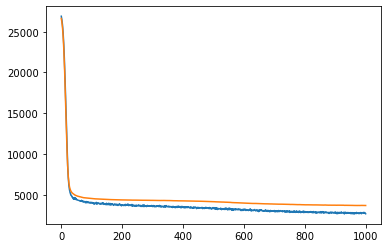

In [30]:
from tensorflow.keras.models import load_model
model0 = load_model('model0/')

test_predictions = model0.predict(X_test).flatten()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [34]:
# Evaluating 
print("MSE:",metrics.mean_squared_error (y_test,test_predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,test_predictions)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,test_predictions))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, test_predictions))
print("RMAE:", metrics.mean_absolute_error (y_test, test_predictions)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,test_predictions))
print("R2:", metrics.r2_score(y_test,test_predictions))

MSE: 3679.4949865554586
RMSE: 60.65884095954569
RRMSE: 0.4435081823709825
MAE: 43.18521519462536
RMAE: 0.31574946031430856
EV: 0.5358348648292527
R2: 0.5356321220218995
